# Artigo de Pós-Graduação PUCRS

### Machine Learning.

In [1]:
import pandas as pd
import datetime
import glob
from minio import Minio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
client = Minio(
        "localhost:9000",
        access_key="minioadmin",
        secret_key="minioadmin",
        secure=False
    )

### Baixando o Dataset do Data Lake.

In [16]:
client.fget_object(
            "processing",
            "employeesDataset.parquet",
            "temp_.parquet",
)
df = pd.read_parquet("temp_.parquet")
df = df[['Department', 'DaysLateLast30', 'Absences',
       'EmpSatisfaction', 'EngagementSurvey', 'PerformanceScore',
       'Termd']]

client.fget_object(
            "processing",
            "departmentSalaryTermd.parquet",
            "temp_.parquet",
)
dfSalary = pd.read_parquet("temp_.parquet")
dfSalary = dfSalary[['SalaryLevel']]

client.fget_object(
            "processing",
            "timeInCompany.parquet",
            "temp_.parquet",
)
dftimeInCompany = pd.read_parquet("temp_.parquet")
dftimeInCompany = dftimeInCompany[['TimeInCompany']]

client.fget_object(
            "processing",
            "numberSpecialProjects.parquet",
            "temp_.parquet",
)
dfNumberSpecialProjects = pd.read_parquet("temp_.parquet")
dfNumberSpecialProjects = dfNumberSpecialProjects[['SpecialProjectsCount']]

client.fget_object(
            "processing",
            "employeePerformanceEvaluation.parquet",
            "temp_.parquet",
)
dfPerfScoreFullyMeets = pd.read_parquet("temp_.parquet")
dfPerfScoreFullyMeets = dfPerfScoreFullyMeets[['perfScoreSatisfaction']]


df = pd.concat([df, dfSalary, dftimeInCompany, dfNumberSpecialProjects, dfPerfScoreFullyMeets], axis=1, join="inner")
df


,Department,DaysLateLast30,Absences,EmpSatisfaction,EngagementSurvey,PerformanceScore,Termd,SalaryLevel,TimeInCompany,SpecialProjectsCount,perfScoreSatisfaction
0,Production,0,1,5,4.60,Exceeds,0,medium,8,0,False
1,IT/IS,0,17,3,4.96,Fully Meets,1,high,2,6,False
2,Production,0,3,3,3.02,Fully Meets,1,medium,2,0,False
3,Production,0,15,5,4.84,Fully Meets,0,medium,11,0,True
4,Production,0,2,4,5.00,Fully Meets,1,low,6,0,False
...,...,...,...,...,...,...,...,...,...,...,...
306,Production,0,13,4,4.07,Fully Meets,0,medium,5,0,True
307,Production,5,4,2,3.20,PIP,1,low,8,0,False
308,IT/IS,0,16,5,4.60,Exceeds,0,high,9,6,False
309,IT/IS,0,11,3,5.00,Fully Meets,0,high,4,5,True


In [4]:
df.groupby(["perfScoreSatisfaction"])["perfScoreSatisfaction"].count()

perfScoreSatisfaction
False    143
True     168
Name: perfScoreSatisfaction, dtype: int64

#### Verificando os registros missing.

In [5]:
df.isnull().sum()

Department               0
DaysLateLast30           0
Absences                 0
EmpSatisfaction          0
EngagementSurvey         0
PerformanceScore         0
Termd                    0
SalaryLevel              0
TimeInCompany            0
SpecialProjectsCount     0
perfScoreSatisfaction    0
dtype: int64

In [6]:
df[df.notnull()]

,Department,DaysLateLast30,Absences,EmpSatisfaction,EngagementSurvey,PerformanceScore,Termd,SalaryLevel,TimeInCompany,SpecialProjectsCount,perfScoreSatisfaction
0,Production,0,1,5,4.60,Exceeds,0,medium,8,0,False
1,IT/IS,0,17,3,4.96,Fully Meets,1,high,2,6,False
2,Production,0,3,3,3.02,Fully Meets,1,medium,2,0,False
3,Production,0,15,5,4.84,Fully Meets,0,medium,11,0,True
4,Production,0,2,4,5.00,Fully Meets,1,low,6,0,False
...,...,...,...,...,...,...,...,...,...,...,...
306,Production,0,13,4,4.07,Fully Meets,0,medium,5,0,True
307,Production,5,4,2,3.20,PIP,1,low,8,0,False
308,IT/IS,0,16,5,4.60,Exceeds,0,high,9,6,False
309,IT/IS,0,11,3,5.00,Fully Meets,0,high,4,5,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Department             311 non-null    object 
 1   DaysLateLast30         311 non-null    int64  
 2   Absences               311 non-null    int64  
 3   EmpSatisfaction        311 non-null    int64  
 4   EngagementSurvey       311 non-null    float64
 5   PerformanceScore       311 non-null    object 
 6   Termd                  311 non-null    int64  
 7   SalaryLevel            311 non-null    object 
 8   TimeInCompany          311 non-null    int64  
 9   SpecialProjectsCount   311 non-null    int64  
 10  perfScoreSatisfaction  311 non-null    bool   
dtypes: bool(1), float64(1), int64(6), object(3)
memory usage: 24.7+ KB


###  Importancia de Features

In [8]:
df.head()

,Department,DaysLateLast30,Absences,EmpSatisfaction,EngagementSurvey,PerformanceScore,Termd,SalaryLevel,TimeInCompany,SpecialProjectsCount,perfScoreSatisfaction
0,Production,0,1,5,4.60,Exceeds,0,medium,8,0,False
1,IT/IS,0,17,3,4.96,Fully Meets,1,high,2,6,False
2,Production,0,3,3,3.02,Fully Meets,1,medium,2,0,False
3,Production,0,15,5,4.84,Fully Meets,0,medium,11,0,True
4,Production,0,2,4,5.00,Fully Meets,1,low,6,0,False


vamos desenvolver um modelo que use a classe perfScoreSatisfaction que posie valor do tipo discreto, onde sabemos se o funcionário está satisfeito com a empresa e é engajado, nos conduz a um problema do tipo classificação supervisionada. Ou seja, tempos um atributo para passar para o modelo.


# Preprocessamento de dados

#### Converte os atributos categoricos em númericos.

Aplicamos uma tecnica simples de transformação dos dados, transformando dados categoricos em numericos por duas razoes: A maioria dos modelos que usamos em ciências de dados tem como entrada valores numericos, não sendo preparados para trabalhar com valores catégoricos; Os atributos categoricos tem pouca cardinalidade, tendo poucos registros unicos

In [17]:
df["Department"] = df["Department"].astype('category').cat.codes
df["SalaryLevel"] = df["SalaryLevel"].astype('category').cat.codes
df["PerformanceScore"] = df["PerformanceScore"].astype('category').cat.codes
df["perfScoreSatisfaction"] = df["perfScoreSatisfaction"].astype('category').cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Department             311 non-null    int8   
 1   DaysLateLast30         311 non-null    int64  
 2   Absences               311 non-null    int64  
 3   EmpSatisfaction        311 non-null    int64  
 4   EngagementSurvey       311 non-null    float64
 5   PerformanceScore       311 non-null    int8   
 6   Termd                  311 non-null    int64  
 7   SalaryLevel            311 non-null    int8   
 8   TimeInCompany          311 non-null    int64  
 9   SpecialProjectsCount   311 non-null    int64  
 10  perfScoreSatisfaction  311 non-null    int8   
dtypes: float64(1), int64(6), int8(4)
memory usage: 18.3 KB


In [18]:
df.head()

,Department,DaysLateLast30,Absences,EmpSatisfaction,EngagementSurvey,PerformanceScore,Termd,SalaryLevel,TimeInCompany,SpecialProjectsCount,perfScoreSatisfaction
0,3,0,1,5,4.60,0,0,2,8,0,0
1,2,0,17,3,4.96,1,1,0,2,6,0
2,3,0,3,3,3.02,1,1,2,2,0,0
3,3,0,15,5,4.84,1,0,2,11,0,1
4,3,0,2,4,5.00,1,1,1,6,0,0


#### Separando os conjuntos de dados.

In [22]:
#perfScoreSatisfaction
targetName = 'perfScoreSatisfaction'
X = df.drop('perfScoreSatisfaction', axis=1)
y = df[targetName]

#### Transformando os dados.
Vamos transformar os valores dos atibutos em uma mesma escala. Uma vez que temos varios atributos em diferentes escalas, com o MimMaxScaler do sklearn vamos garantir a mesma escala para os atributos.

Isso é importante no processo de convergencia do algoritmo, nos calculos internos que o algoritmo faz para gerar o modelo os calculos de valores na mesma escala ajuda o medelo a ter uma peformace melhor, a convergir com mais velocidade, principalmente em cenários complexo como nos uso de deep learning. 

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.6       , 0.        , 0.        , ..., 1.        , 0.58333333,
        0.        ],
       [0.4       , 0.        , 0.84210526, ..., 0.        , 0.08333333,
        0.75      ],
       [0.6       , 0.        , 0.10526316, ..., 1.        , 0.08333333,
        0.        ],
       ...,
       [0.4       , 0.        , 0.78947368, ..., 0.        , 0.66666667,
        0.75      ],
       [0.4       , 0.        , 0.52631579, ..., 0.        , 0.25      ,
        0.625     ],
       [0.6       , 0.        , 0.05263158, ..., 0.5       , 0.33333333,
        0.        ]])

#### Separando os conjuntos.

Definindo nosso modelo como preditivo e para dar uma garantia que o modelo é integro, é importante particionar os dados em dois conjunto, um para treinar e outro para testar o modelo

Apesar do dataset ter a classe target perfScoreSatisfaction muito balanceada, o dataset tambem tem outras classes desbalanceadas. Respeitando a distribuição de classes com uma amostra que reúne clases mais ou menos homogêneas entre si, usamos o parametro stratify.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.3
       ,random_state = 33
       ,stratify = y
)

#### Treinando o algoritmo de arvore de decisão.

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

importances = dtree.feature_importances_
feat_names = df.drop(['perfScoreSatisfaction'],axis=1).columns

filtragem de features importantes mara o modelo escolhi usar as funcionalidades de feature_importances_ dos classificadores. Treinamos o modelos e verificamos quais as feactures mais importantes para o modelo criado, que por sua vez retorna uma listagem de features importantes.
Em ambiente de produção é necessário mais experimentos com outros algoritmos para selecionar as features importantes

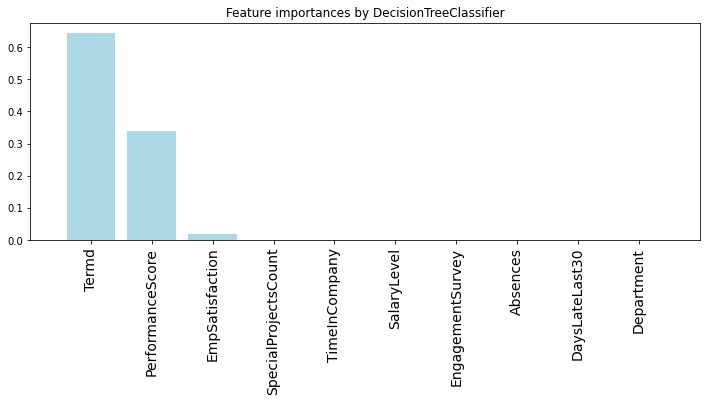

In [28]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,4))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

Com modelo de arvore de decisão as features mais relevantes são Termd e PerfomanceScore com uma indicação pequena para EmpSatisfaction

#### Filtrando apenas os atributos relevantes.

In [29]:
df.columns

Index(['Department', 'DaysLateLast30', 'Absences', 'EmpSatisfaction',
       'EngagementSurvey', 'PerformanceScore', 'Termd', 'SalaryLevel',
       'TimeInCompany', 'SpecialProjectsCount', 'perfScoreSatisfaction'],
      dtype='object')

In [30]:
X = df[["Termd","PerformanceScore","EmpSatisfaction"]]

#### Separando os conjuntos de dados.

In [31]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
        X
       ,y
       ,test_size = 0.2
       ,random_state = 123
       ,stratify = y
)

X_train

array([[1.        , 0.33333333, 1.        ],
       [1.        , 0.33333333, 0.75      ],
       [0.        , 0.        , 0.5       ],
       [1.        , 0.33333333, 0.5       ],
       [0.        , 0.33333333, 0.5       ],
       [1.        , 0.33333333, 1.        ],
       [0.        , 0.33333333, 0.5       ],
       [1.        , 0.33333333, 1.        ],
       [0.        , 0.        , 0.75      ],
       [1.        , 0.33333333, 1.        ],
       [0.        , 0.33333333, 0.75      ],
       [0.        , 0.33333333, 1.        ],
       [0.        , 0.33333333, 0.75      ],
       [1.        , 0.66666667, 0.75      ],
       [1.        , 0.33333333, 0.75      ],
       [1.        , 0.33333333, 0.75      ],
       [0.        , 0.33333333, 1.        ],
       [1.        , 0.66666667, 1.        ],
       [1.        , 0.33333333, 0.5       ],
       [0.        , 0.33333333, 0.5       ],
       [0.        , 0.33333333, 1.        ],
       [1.        , 0.33333333, 0.75      ],
       [0.

#### Função do modelo de base.

Pensando na satisfação e engajamento do funcionario, vamos preparar testes para features relevantes para outros algoritmos.

Para isso estabelecer qual a metrica, o que levar em consideração para decidir se o algoritmo é eficiente.

Começamos criando um modelo base line para que os modelos a serem esperimentados cheguem proximos do resultado do base line. Se ele não tiver com os resultados proximos da baseline, não faz sentido investir tempo nesse modelo. Além disso, a função da baseline é importante para conseguir explicar o resultado do modelo de forma intuitiva para pessoas que não entende ML. Por exemplo, gerei um modelo de previsão de engajamento e satisfação que é superior a média, a média chegamos no resultado x enquanto que nosso modelo atingiu x+y. Os interessados conseguem entender que o modelo ganha de algo simples que já é usado, como a média.

por causa dos dados despalenceados, essa função sempre vai retornar zero para a probabilidade da maior ocorrencia do meu conjunto de dados


In [32]:
def baseRateModel(X) :
    y = np.zeros(X.shape[0])
    return y aquiiiiiiiii 1:08

#### Importando métodos de métrica de avaliação.

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [34]:
def accuracy_result(y_test,y_predict):
    acc = accuracy_score(y_test, y_predict)
    print ("Accuracy = %2.2f" % acc)

In [35]:
def roc_classification_report_results(model,y_test,y_predict):
    roc_ = roc_auc_score(y_test, y_predict)
    classfication_report = classification_report(y_test, y_predict)
    
    print ("\n{} AUC = {}\n".format(model, roc_))
    print(classfication_report)

#### Análise do modelo de baseline

In [36]:
y_predict = baseRateModel(X_test)

accuracy_result(y_test, y_predict)

Accuracy = 0.46


In [37]:
roc_classification_report_results("Base Model", y_test, y_predict)


Base Model AUC = 0.5

              precision    recall  f1-score   support

           0       0.46      1.00      0.63        29
           1       0.00      0.00      0.00        34

    accuracy                           0.46        63
   macro avg       0.23      0.50      0.32        63
weighted avg       0.21      0.46      0.29        63



/Users/san/Documents/GitHub/Artigo_PUCRS_CD_IA/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/san/Documents/GitHub/Artigo_PUCRS_CD_IA/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/san/Documents/GitHub/Artigo_PUCRS_CD_IA/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

### Modelo de Regressão Logística.

#### Instânciando o algoritmo.

In [38]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#### Realizando o treinamento.

In [39]:
logis.fit(X_train, y_train)

LogisticRegression()

#### Calculando as predições.

In [40]:
y_predict = logis.predict(X_test)

#### Avaliando o resultado.

In [41]:
accuracy_result(y_test, y_predict)

Accuracy = 0.89


In [42]:
roc_classification_report_results("Logistic Regression", y_test, y_predict)


Logistic Regression AUC = 0.8793103448275862

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        29
           1       0.83      1.00      0.91        34

    accuracy                           0.89        63
   macro avg       0.91      0.88      0.88        63
weighted avg       0.91      0.89      0.89        63



### Modelo de Arvore de decisão.

#### Instânciando o algoritmo.

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

#### Realizando o treinamento.

In [44]:
dtree = dtree.fit(X_train,y_train)

#### Calculando as predições.

In [45]:
y_predict = dtree.predict(X_test)

#### Avaliando o resultado.

In [46]:
accuracy_result(y_test, y_predict)

Accuracy = 0.97


In [47]:
roc_classification_report_results("Decision Tree", y_test, y_predict)


Decision Tree AUC = 0.9655172413793103

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        29
           1       0.94      1.00      0.97        34

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63



### Modelo de Arvore Aleatória (Random Forest)

#### Instânciando o algoritmo.

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

#### Realizando o treinamento.

In [49]:
rf = rf.fit(X_train,y_train)

#### Calculando as predições.

In [50]:
y_predict = rf.predict(X_test)

#### Avaliando o resultado.

In [51]:
accuracy_result(y_test, y_predict)

Accuracy = 1.00


In [52]:
roc_classification_report_results("Random Forest", y_test, y_predict)


Random Forest AUC = 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        34

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



### Pycaret

#### Importando os métodos.

In [53]:
from pycaret.classification import *

In [54]:
df.head()

,Department,DaysLateLast30,Absences,EmpSatisfaction,EngagementSurvey,PerformanceScore,Termd,SalaryLevel,TimeInCompany,SpecialProjectsCount,perfScoreSatisfaction
0,3,0,1,5,4.60,0,0,2,8,0,0
1,2,0,17,3,4.96,1,1,0,2,6,0
2,3,0,3,3,3.02,1,1,2,2,0,0
3,3,0,15,5,4.84,1,0,2,11,0,1
4,3,0,2,4,5.00,1,1,1,6,0,0


#### Definindo o Setup.

In [55]:
s = setup( df[['Department', 'DaysLateLast30', 'Absences', 'EmpSatisfaction',
       'EngagementSurvey', 'PerformanceScore', 'Termd', 'SalaryLevel',
       'TimeInCompany', 'SpecialProjectsCount']]
          ,target = "PerformanceScore"
          ,numeric_features = ["TimeInCompany"]
          ,normalize = True
          ,normalize_method = "minmax"
          ,data_split_stratify = True
          ,fix_imbalance = True,
         )

,Description,Value
0,Session id,1295
1,Target,PerformanceScore
2,Target type,Multiclass
3,Original data shape,"(311, 10)"
4,Transformed data shape,"(770, 10)"
5,Transformed train set shape,"(676, 10)"
6,Transformed test set shape,"(94, 10)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


#### Comparando diferentes modelos.

In [56]:
best = compare_models(fold = 5,sort = 'AUC',)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6358,0.8217,0.6358,0.8137,0.6865,0.3116,0.3601,0.5320
lda,Linear Discriminant Analysis,0.6219,0.8202,0.6219,0.8098,0.6718,0.3083,0.3627,0.0100
nb,Naive Bayes,0.3464,0.7406,0.3464,0.7392,0.3697,0.1185,0.2002,0.0080
et,Extra Trees Classifier,0.7742,0.7384,0.7742,0.7530,0.7590,0.3512,0.3547,0.0300
knn,K Neighbors Classifier,0.6129,0.7325,0.6129,0.7595,0.6624,0.2269,0.2489,0.1460
rf,Random Forest Classifier,0.7925,0.7171,0.7925,0.7535,0.7685,0.3921,0.4038,0.0360
lightgbm,Light Gradient Boosting Machine,0.7879,0.7120,0.7879,0.7600,0.7698,0.3860,0.3943,0.0320
gbc,Gradient Boosting Classifier,0.7559,0.6834,0.7559,0.7454,0.7434,0.3007,0.3052,0.0720
dt,Decision Tree Classifier,0.7144,0.6678,0.7144,0.7599,0.7290,0.2985,0.3026,0.0100
ada,Ada Boost Classifier,0.8297,0.6657,0.8297,0.7237,0.7725,0.4275,0.4771,0.0160


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

#### Criando o modelo.

In [57]:
gbc = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7045,0.6799,0.7045,0.6971,0.6995,0.1955,0.1960
1,0.7727,0.7505,0.7727,0.7608,0.7628,0.3838,0.3852
2,0.7209,0.6612,0.7209,0.7519,0.7209,0.2205,0.2219
3,0.7674,0.5905,0.7674,0.7322,0.7447,0.2456,0.2524
4,0.8140,0.7348,0.8140,0.7849,0.7888,0.4583,0.4706
Mean,0.7559,0.6834,0.7559,0.7454,0.7434,0.3007,0.3052
Std,0.0391,0.0571,0.0391,0.0295,0.0312,0.1022,0.1053


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

#### Realizando o tunning do modelo.

In [58]:
perfScoreSatisfactionGbc = tune_model(gbc
                      ,fold = 5
                      ,custom_grid = {"learning_rate":[0.1,0.2,0.5]
                                     ,"n_estimators":[100,500,1000]
                                     ,"min_samples_split":[1,2,5,10]
                                     ,"max_depth":[1,3,9]
                                     }
                      ,optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7955,0.8723,0.7955,0.8048,0.7991,0.4877,0.4887
1,0.8409,0.8299,0.8409,0.8485,0.8409,0.5855,0.5863
2,0.7907,0.6996,0.7907,0.7623,0.7717,0.3571,0.3620
3,0.8372,0.6703,0.8372,0.7419,0.7809,0.3768,0.4535
4,0.7674,0.6875,0.7674,0.7171,0.7356,0.3228,0.3315
Mean,0.8063,0.7519,0.8063,0.7749,0.7856,0.4260,0.4444
Std,0.0284,0.0826,0.0284,0.0467,0.0345,0.0970,0.0913


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


#### Finalizando o modelo.

In [59]:
final_model = finalize_model(perfScoreSatisfactionGbc)
save_model(final_model,'model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/var/folders/mj/jgp1syh15f353pj12fcfnzyc0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['TimeInCompany'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(ex...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                             max_depth=1

#### Transferindo os arquivos para o Data Lake.

#### Modelo de Classificação.

In [60]:
client.fput_object(
    "curated",
    "model.pkl",
    "model.pkl"
)

#### Exportando o conjunto de dados para o disco.

In [61]:
df.to_csv("dataset.csv",index=False)

In [62]:
client.fput_object(
    "curated",
    "dataset.csv",
    "dataset.csv"
)